In [12]:

!pip install pyvital vitaldb vital
!pip install neurokit2
import vitaldb
import pandas as pd
import numpy as np

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # Load clinical data
df_trks = pd.read_csv('https://api.vitaldb.net/trks')  # Load track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # Load lab result

In [13]:
# inclusion / exclusion criteria
caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'Solar8000/ST_II', 'caseid'])
)

print('Total {} cases found'.format(len(caseids)))

Total 5978 cases found


In [14]:
import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()



srate = 100
vals = vitaldb.load_case(caseids[0], ['Solar8000/ST_II'], 1 / srate)


initial_signal = vals[:,0]

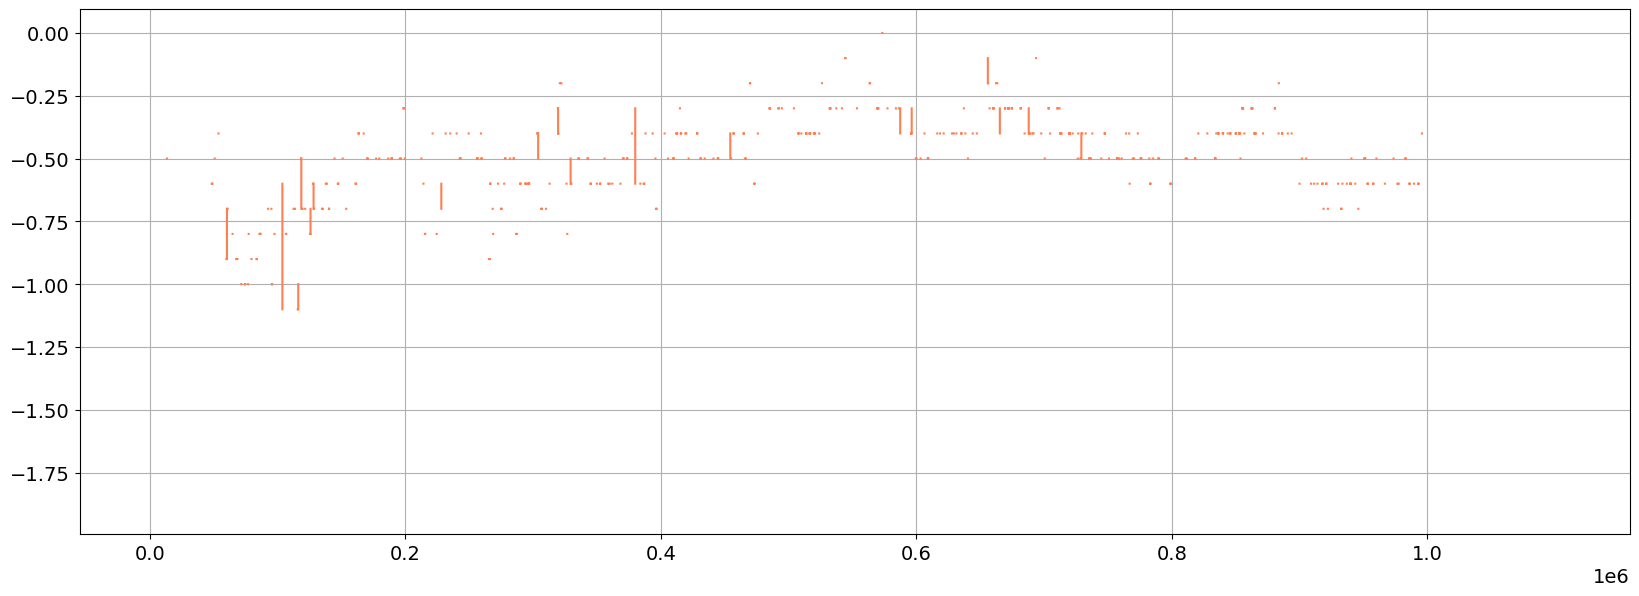

In [15]:
nrml_plt(initial_signal)

In [21]:



print("mean:",np.nanmean(initial_signal))
print("median:",np.nanmedian(initial_signal))
print("variance:",np.nanvar(initial_signal))
print("standard deviation:",np.nanstd(initial_signal))
print("Max:",np.nanmax(initial_signal))
print("Mix:",np.nanmin(initial_signal))



mean: -0.5082061780157454
median: -0.5
variance: 0.044842797423342115
standard deviation: 0.21176118016138396
Max: 0.0
Mix: -1.899999976158142


<ipython-input-44-ec75a503cf31>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(initial_signal, hist=True, kde=True,


<Axes: ylabel='Density'>

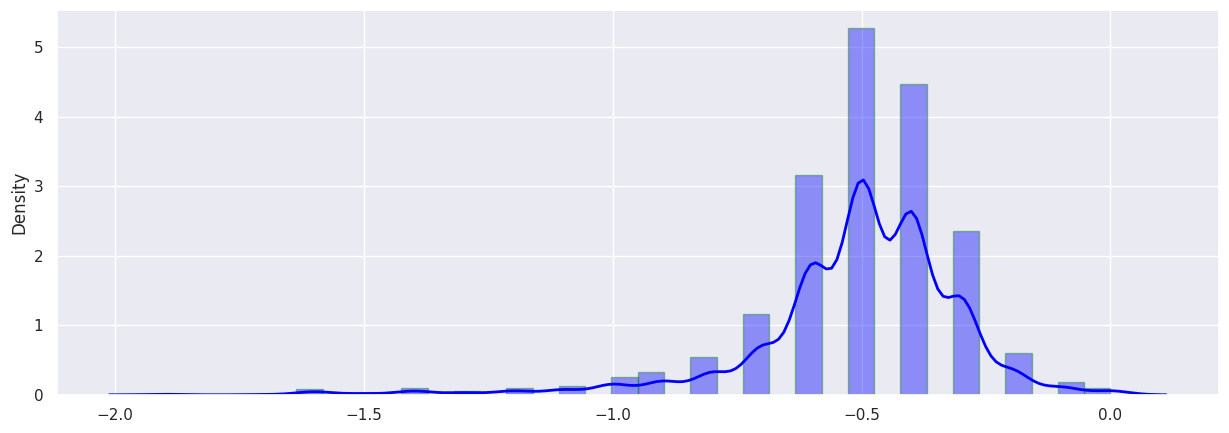

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.distplot(initial_signal, hist=True, kde=True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 2})